# Comparing classifiers

In this part you will compare the classification algorithms seen in this and the previous labs of MALIS course:

1. K nearest neighbors
2. Logistic regression
3. Neural Networks
4. Support Vector Machine (linear)
5. SVM with RBF kernel
6. Classification Tree

You have only to run the cells and answer the questions you can find after the code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.simplefilter("ignore")
from sklearn.exceptions import ConvergenceWarning

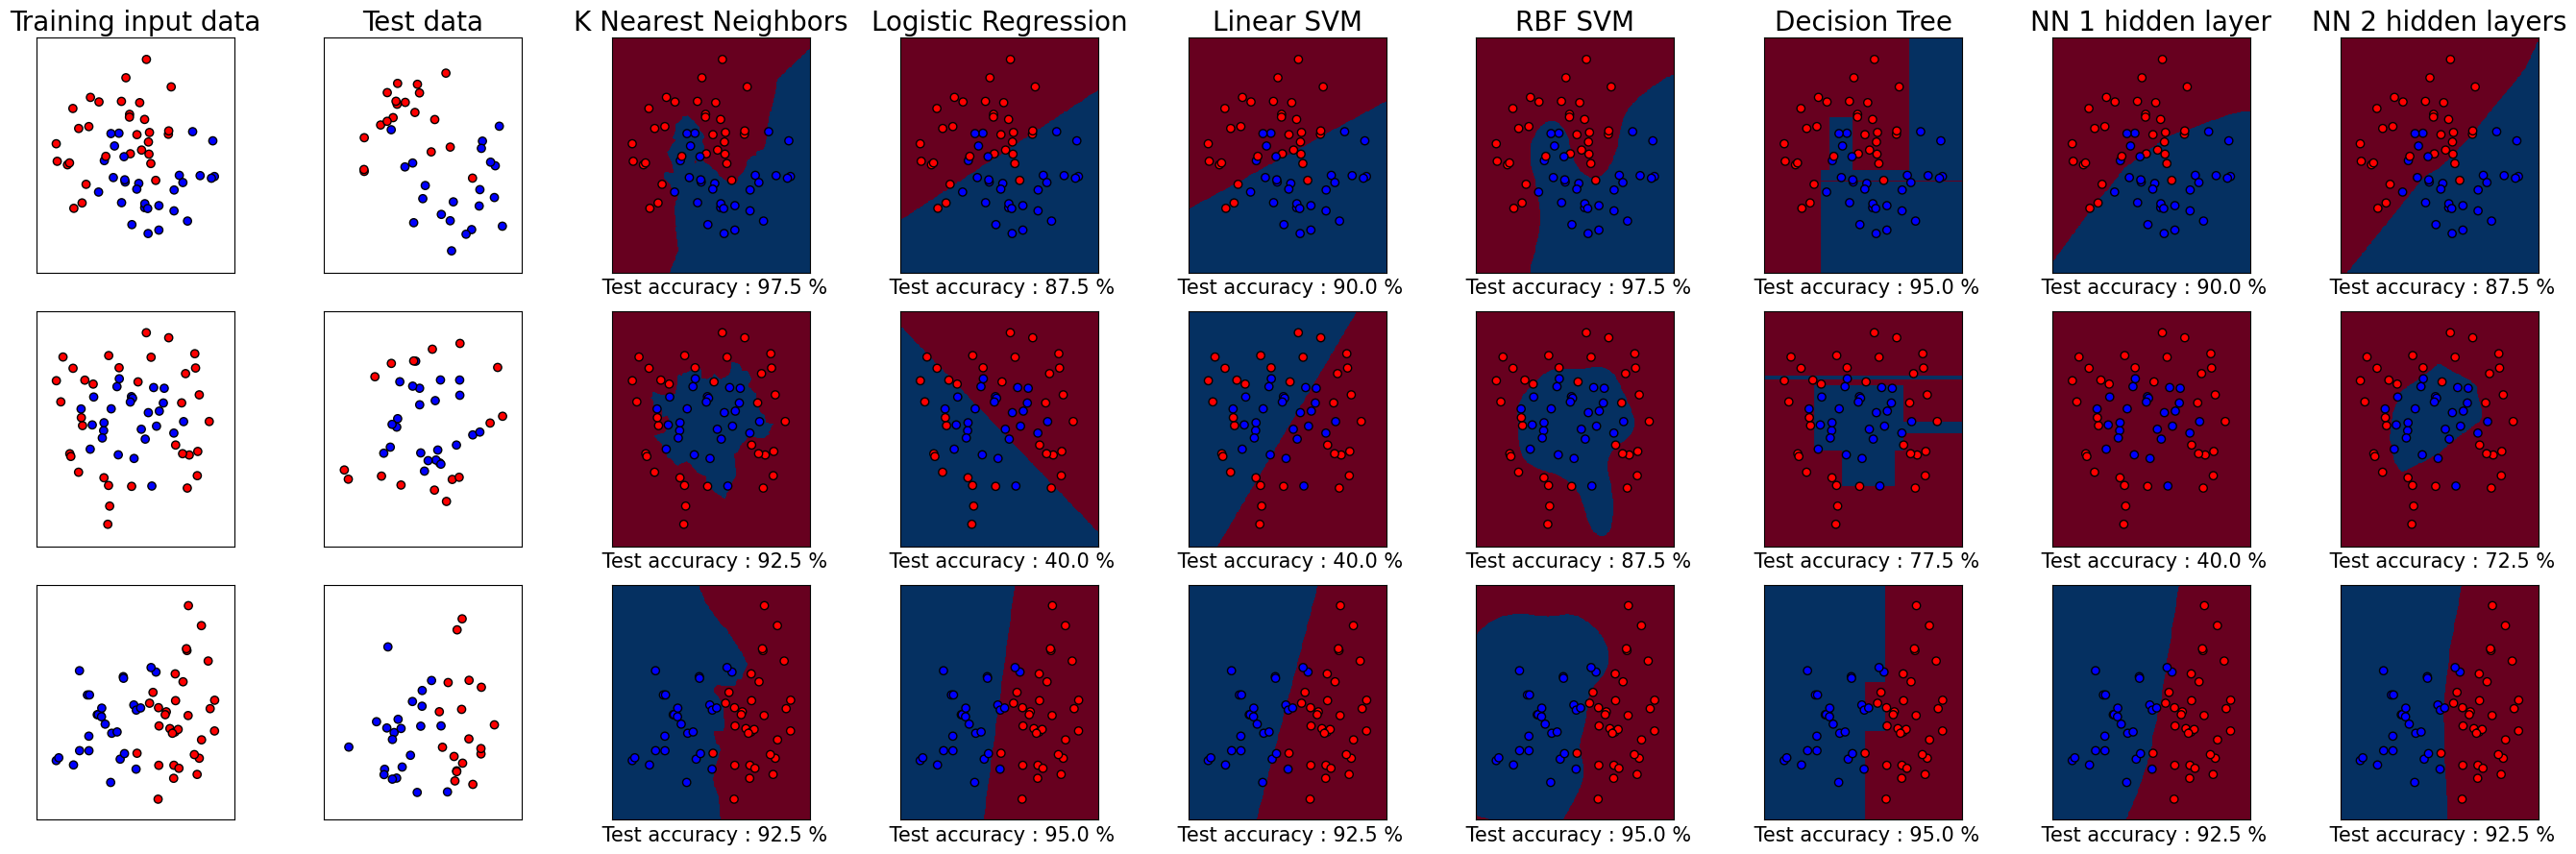

In [2]:
# The following code is not done from scratch, but it is realized using :
# https://github.com/amueller/introduction_to_ml_with_python/blob/master/02-supervised-learning.ipynb

h = .02  # step size in the mesh

# classifier names and classes :
names = ["K Nearest Neighbors", "Logistic Regression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "NN 1 hidden layer","NN 2 hidden layers"]
classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(solver='liblinear', max_iter=400),
    SVC(kernel="linear", C=2000),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    MLPClassifier(hidden_layer_sizes=(10)),
    MLPClassifier(hidden_layer_sizes=(10,10))]


# set used to train and test
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    
    # split in train and test
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    # plot the training dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Training input data",size=20)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1
    
    # plot the test dataset
    ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
    if ds_cnt == 0:
        ax.set_title("Test data",size=20)
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 2, i)
        clf.fit(X_train, y_train)

        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = np.where(Z>=np.mean(Z),1,0)
        else:
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])      

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.pcolormesh(xx, yy, Z, cmap=cm, alpha=0.9)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        # Plot the name of the classifier in each column
        if ds_cnt == 0:
            ax.set_title(name,size=20)
        
        # Plot the test accuracy
        ax.set_xlabel((' Test accuracy : %.1f %%' % (100*score)),size=15)
        i += 1

plt.tight_layout()
plt.show()

## Question 1

Comment the results obtained. Use the following questions to help you.
1. Which classifiers performs poorly? In which datasets? Why?
2. Do you think some classifiers are overfitting?
    1. If yes: which ones? in which datasets? which elements allow you to say that?
    2. If no : what you should see to say that a classifier is overfitting?
3. How does changing the parameters may affect the results?
   (changing K in nearest neighbors, the hardness of the SVM, the gamma of the RBF kernel, the depth of the tree, the number of neurons of the Neural Networks)

Your answers here: 

1. In the second dataset logistic regression, linear SVM, achieving values of accuracy of 40%. It happens because both the classifiers separates the data linearly, while clearly the second dataset is not linearly separable. They both have a really high value of the accuracy in the third dataset which is linearly separable, while logistic regression performs slightly less well than the other models on the first dataset which is not completely linearly separable. A solution to that can be obtained by using RBF SVM, in which we do a transformation in another space to address the problem of non-linear separability. Also NN1 gives a very bad result on the test accuracy in the second dataset, using only one layer we have the perceptron, and it doesn't perform well in not linearly separable data. We also noticed that, each time we run the code, we have different values of accuracy of NN, which happens because of the random seed.

2. It seems that some models are overfitting in all the tree datasets, in particular: 
- In the first dataset all the models seem to perform well on the training dataset, only Logistic Regression and Linear SVM don't separate well some data. The decision boundaries of the decision tree, however, are fitting the training data too well, and this could lead to overfitting.
- In the second dataset, logistic regression, linear SVM and NN1 don't perform well, as explained above in answer 1, but they are also the only models that are not overfitting. All the others, in fact, have learned too well the training dataset, "adapting" the decision boundaries to that, and in fact we can see that test accuracies are slightly smaller.
- In the third dataset, KNN, RBF SVM and decision tree seems to be overfitting because of their boundaries and really high values of accuracies.
In general we don't want sharp boundaries because we want our model to be able to capture the general shape of the data, being able to generalize.

3. Changing the parameters in our models can affect the results both in a positive or negative way. In particular, changing:
- k in KNN: if k is too small, the model becomes more sensitive to noise and be more incline to local patterns, if k is large the model could consider only global patters ignoring local variations. Both could lead to overfitting.
- hardness of the SVM: modifying the hardness (C) controls model complexity. Increasing C makes the boundary less tolerant, potentially resulting in a complex model. Decreasing C enhances tolerance, leading to a simpler boundary.
- gamma of the RBF kernel: changing gamma alters sensitivity. The higher gamma the more sensitive the model will be ,  and will potentially cause overfitting. And the lower gamma the smoother the boundary can be.
- the depth of the tree: Decision Tree's max_depth affects complexity. Increasing it fits the training data closely but risks overfitting. Decreasing max_depth simplifies the tree, preserving robustness but potentially losing some details.
- number of neurons in the NN: adjusting hidden layer neurons impacts complexity. More neurons capture complexity but increase overfitting risk. Fewer neurons yield a simpler model but may struggle with intricate patterns.